In [1]:
n_prior = 5                 #No. of prior days
n_chg = 2.75                #percentage change in prior days
n_next = 5                  # Return to be expected in next n days

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [3]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [4]:
prior_returns = (nifty_data['Close']/nifty_data['Close'].shift(n_prior) - 1)*100
prior_returns = prior_returns.dropna()

In [6]:
min_val = np.mean(prior_returns) - 3*np.std(prior_returns)
max_val = np.mean(prior_returns) + 3*np.std(prior_returns)
prior_returns = prior_returns[prior_returns.between(min_val,max_val)]

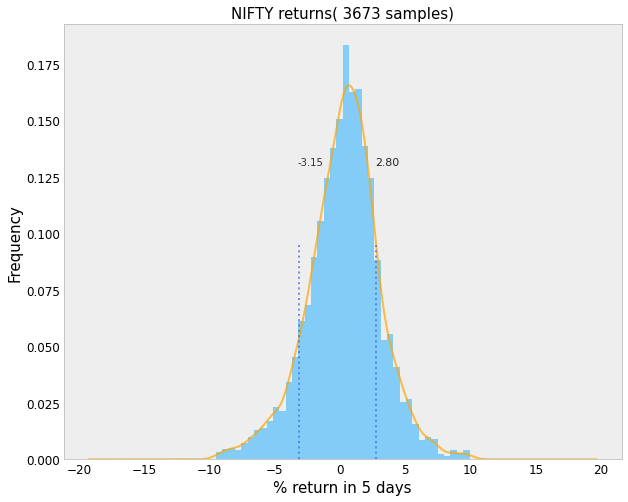

In [9]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(prior_returns, density = True, bins=40, color='#2ab0ff',alpha=0.55)
prior_returns.plot(kind = "kde", color='orange', alpha=0.7)

plt.xlabel('% return in {} days'.format(n_prior), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)

quant_10, quant_85 = prior_returns.quantile(0.10), prior_returns.quantile(0.85)
quants = [[quant_10, 0.7, 0.5], [quant_85, 0.7, 0.5]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='royalblue')
    
plt.text(quant_10-.1, 0.13, '%.2f' % quant_10, size = 10, alpha = 0.8)
plt.text(quant_85-.13, 0.13, '%.2f' % quant_85, size = 11, alpha = 0.85)

plt.title('NIFTY returns( {} samples)'.format(len(prior_returns)),fontsize=15)
plt.grid(False)
plt.show()

In [12]:
prior_returns_above_threshold = prior_returns[prior_returns >= n_chg]
prior_returns_above_threshold.describe()

count    579.000000
mean       4.411206
std        1.508962
min        2.750881
25%        3.254555
50%        3.984304
75%        5.120591
max        9.926782
Name: Close, dtype: float64

In [29]:
post_returns = (nifty_data['Close']/nifty_data['Close'].shift(n_next) - 1)*100
post_returns = post_returns.dropna()

min_val = np.mean(post_returns) - 3*np.std(post_returns)
max_val = np.mean(post_returns) + 3*np.std(post_returns)
post_returns = post_returns[post_returns.between(min_val,max_val)]

In [30]:
post_returns_on_condition_index = []
for date_ix in prior_returns_above_threshold.index:
    date_prior = niftyutils.datetime_to_datetime_str(date_ix)
    ix = post_returns.index.get_loc(date_prior)
    post_returns_on_condition_index.append(ix+n_next)

In [31]:
post_returns_on_condition = post_returns[post_returns_on_condition_index]

In [32]:
post_returns_on_condition.describe()

count    579.000000
mean       0.167719
std        2.845821
min       -9.133704
25%       -1.412475
50%        0.415697
75%        1.835597
max        9.799975
Name: Close, dtype: float64

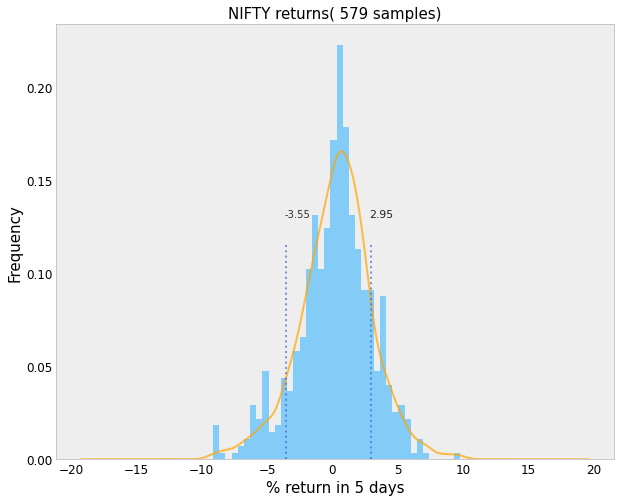

In [38]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(post_returns_on_condition, density = True, bins=40, color='#2ab0ff',alpha=0.55)
prior_returns.plot(kind = "kde", color='orange', alpha=0.7)

plt.xlabel('% return in {} days'.format(n_prior), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)

quant_10, quant_85 = post_returns_on_condition.quantile(0.10), post_returns_on_condition.quantile(0.85)
quants = [[quant_10, 0.7, 0.5], [quant_85, 0.7, 0.5]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='royalblue')
    
plt.text(quant_10-.1, 0.13, '%.2f' % quant_10, size = 10, alpha = 0.8)
plt.text(quant_85-.13, 0.13, '%.2f' % quant_85, size = 11, alpha = 0.85)

plt.title('NIFTY returns( {} samples)'.format(len(post_returns_on_condition)),fontsize=15)
plt.grid(False)
plt.show()

In [40]:
11604 + (11604*2.95)/100

11946.318

In [41]:
11604 + (11604*1.84)/100

11817.5136

In [43]:
11604 - (11604*3.55)/100

11192.058